## 0. PROJECT SETUP

### 0.1. IMPORTS

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

### 0.2. SOURCES

The data set used on this project can be found at: https://data.world/raghu543/credit-card-fraud-data

### 0.3. FUNCTIONS

In [153]:
def confusion_matrix_dataframe(model, X_test, y_test):
    '''
    Receives model and returns dataframe with information from confusion matrix.
    '''
    
    # Makes predictions and returns data from confusion matrix
    predictions = model.predict(X_test)
    matrix = confusion_matrix(y_test, predictions)
    response = dict(True_Positives = matrix[0][0],
                   False_Positives = matrix[0][1],
                   True_Negatives = matrix[1][0],
                   False_Negatives = matrix[1][1],)
    return pd.DataFrame(response, index = [model.steps[0][0]])

## 1. CREATING DATAFRAME

### 1.1. INSERTING DATA

In [3]:
df1 = pd.read_csv("creditcard.csv")
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 1.2. UNDERSTANDING THE DATA

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


1. No null values
2. Target variable is the column called "Class"
3. Aside from "Time" and "Amount", all other columns have been PCA reduced and can't be explained
4. No need to change column names or types
5. Features have been standardized but not normalized

## 2. EDA

In [5]:
df2 = df1.copy()

### 2.1. MINDMAP OF HYPOTHESIS

Since most columns have been PCA reduced, one can only create hypothesis about the known columns:

1. Does time significantly affect the number of frauds?
2. Does the amount have to do with a transaction being classified as fraud?

### 2.2. EDA

### 2.2.1. TARGET VARIABLE

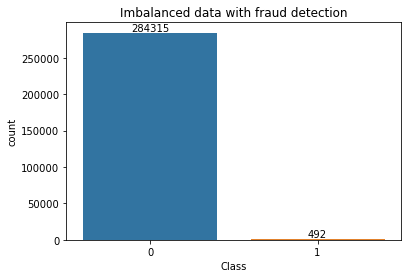

In [6]:
plot = sns.countplot(x = df2['Class'])
labels = df2['Class'].value_counts().values
plot.bar_label(container=plot.containers[0], labels=labels)
plot.set(title = "Imbalanced data with fraud detection");

### 2.2.2. FEATURES

In [7]:
sample = df2.sample(1000)
sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
220580,142230.0,1.930823,-0.971130,-2.213172,-0.744840,-0.219678,-1.771505,0.571187,-0.729158,-1.106117,...,0.464303,0.988613,-0.232436,0.140205,0.407152,0.055761,-0.107820,-0.048335,190.94,0
120452,75834.0,1.164399,-0.174240,0.452775,1.171501,-0.005844,1.244785,-0.579895,0.447720,0.835146,...,-0.123256,-0.048402,-0.213236,-1.151799,0.708704,-0.199067,0.062363,-0.002151,4.49,0
125907,77859.0,1.092446,-2.008956,1.524474,-0.909020,-2.102153,1.542477,-2.057344,0.605613,-0.542989,...,-0.145932,0.286989,-0.037291,-0.250771,0.182865,-0.049268,0.124818,0.031190,104.45,0
39076,39682.0,1.009555,-0.322419,0.501951,1.033746,-0.317320,0.431012,-0.323396,0.054104,0.461689,...,0.101561,0.054401,-0.307052,-0.993344,0.495802,-0.291367,0.038254,0.051725,144.00,0
47832,43383.0,1.188452,0.569254,-0.355462,2.234741,0.830683,0.197342,0.511983,-0.089492,-0.993925,...,-0.030724,-0.146988,-0.224414,-0.884620,0.773706,0.154432,-0.031127,0.002831,37.27,0


#### 2.2.2.1. AMOUNT OF TRANSACTION

In [8]:
df2.groupby('Class').mean()['Amount']

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


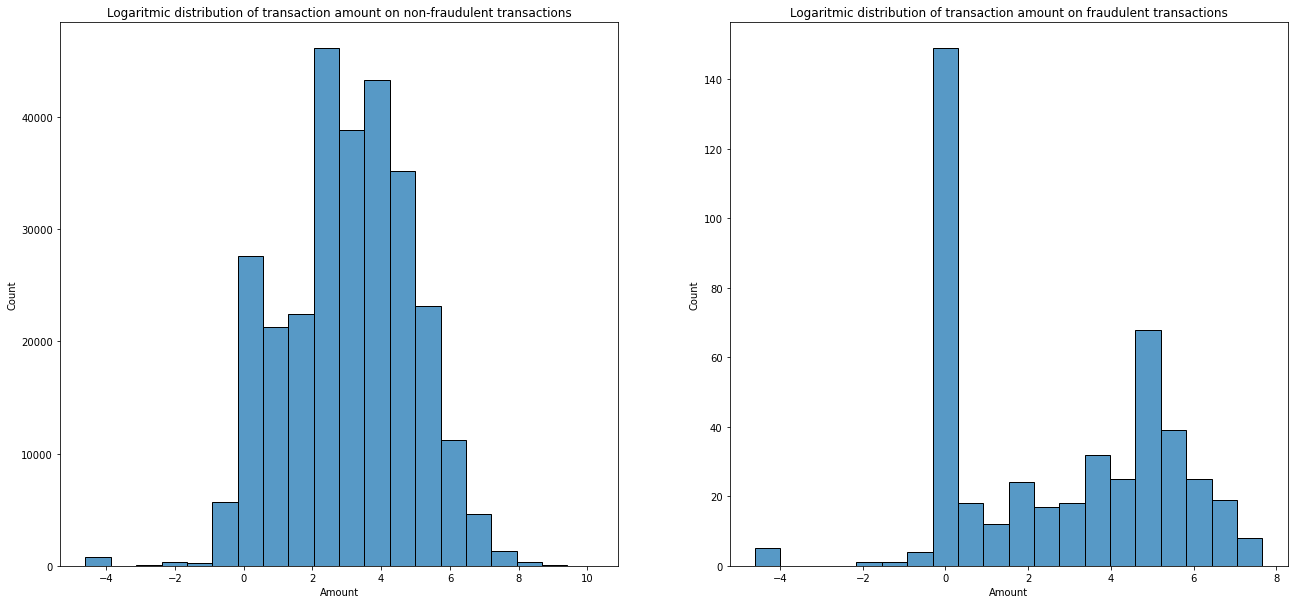

In [9]:
fig = plt.figure(figsize = (22,10))
plt.subplot(1, 2, 1)
ax1 = sns.histplot(data = np.log(df2[df2['Class'] == 0]['Amount']), bins = 20)
ax1.set_title('Logaritmic distribution of transaction amount on non-fraudulent transactions')
plt.subplot(1, 2, 2)
ax2 = sns.histplot(data = np.log(df2[df2['Class'] == 1]['Amount']), bins = 20)
ax2.set_title('Logaritmic distribution of transaction amount on fraudulent transactions');

#### 2.2.2.2. TIME OF TRANSACTION

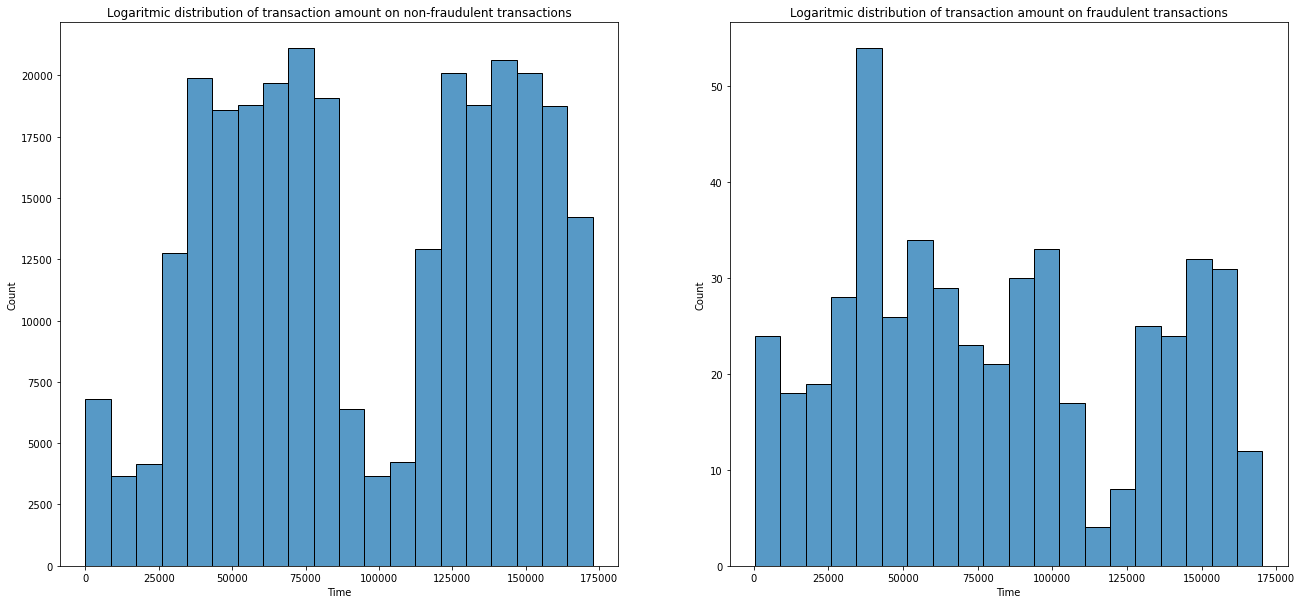

In [10]:
fig = plt.figure(figsize = (22,10))
plt.subplot(1, 2, 1)
ax1 = sns.histplot(data = df2[df2['Class'] == 0]['Time'], bins = 20)
ax1.set_title('Logaritmic distribution of transaction amount on non-fraudulent transactions')
plt.subplot(1, 2, 2)
ax2 = sns.histplot(data = df2[df2['Class'] == 1]['Time'], bins = 20)
ax2.set_title('Logaritmic distribution of transaction amount on fraudulent transactions');

<AxesSubplot:>

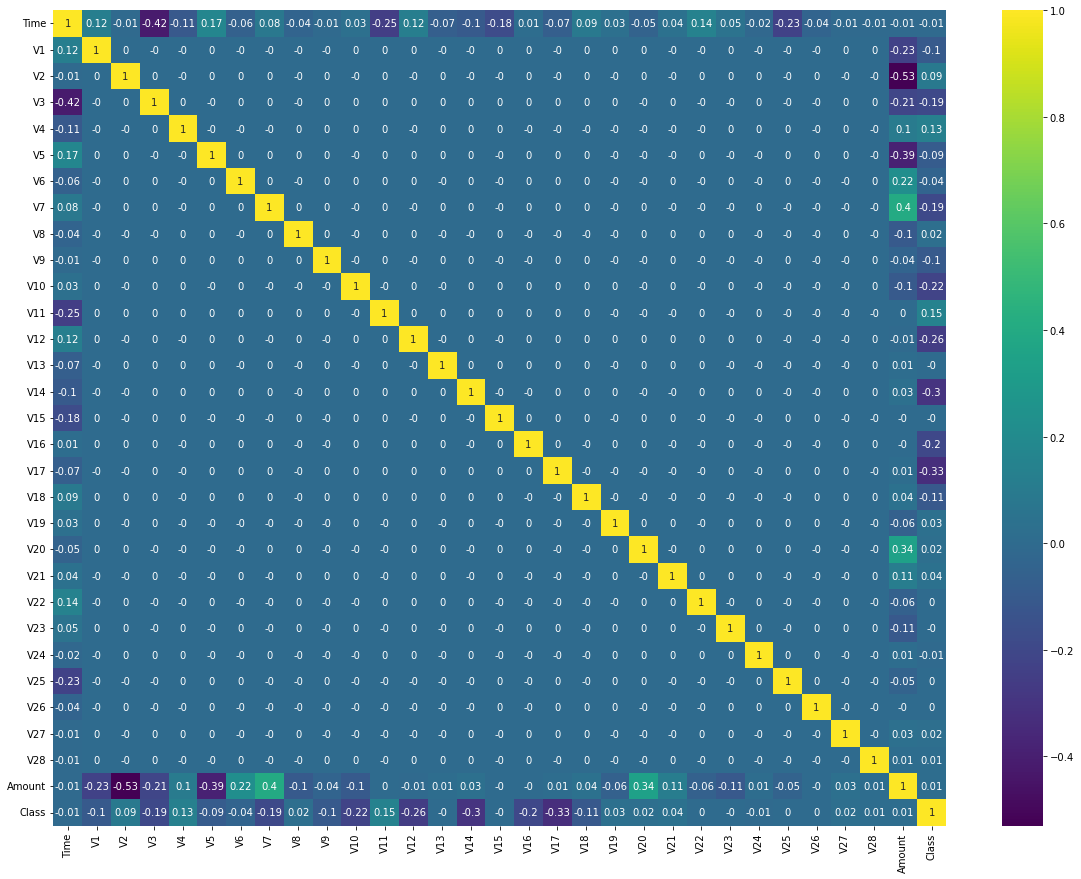

In [11]:
plt.figure(figsize = (20, 15))
sns.heatmap(data = df2.corr().round(2), annot = True, cmap = 'viridis')

## 3. FEATURE ENGINEERING AND SELECTION

In [12]:
df3 = df2.copy()

### 3.1. FEATURE ENGINEERING

### 3.2. FEATURE SELECTION

In [26]:
df3 = df3.drop(['Amount', 'Time'], axis = 1)

## 4. MODELING

In [29]:
df4 = df3.copy()

In [30]:
X = df4.drop(['Class'], axis = 1)
y = df4['Class']

1. Test regular train test split, with 10% of test cases on test set
2. Test regular train test split, with 20% of test cases on test set
3. Gather all positive examples on the test set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### 4.1. CREATING BASELINE

Here, two models were tested (one linear and one non-linear) and the one which performed best (Random Forest) was chosen to be the baseline.

#### 4.1.1. LOGISTIC REGRESSION

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train);

In [53]:
predictions = lr.predict(X_test)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[28429     6]
 [   17    29]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.83      0.63      0.72        46

    accuracy                           1.00     28481
   macro avg       0.91      0.82      0.86     28481
weighted avg       1.00      1.00      1.00     28481



#### 4.1.2. RANDOM FOREST

In [154]:
rf = RandomForestClassifier(n_estimators=10, verbose = 0, random_state=101)
rf.fit(X_train, y_train);

In [155]:
predictions = rf.predict(X_test)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[28435     0]
 [   11    35]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       1.00      0.76      0.86        46

    accuracy                           1.00     28481
   macro avg       1.00      0.88      0.93     28481
weighted avg       1.00      1.00      1.00     28481



In [156]:
matrix = confusion_matrix(y_test, predictions)
response = dict(True_Positives = matrix[0][0],
               False_Positives = matrix[0][1],
               True_Negatives = matrix[1][0],
               False_Negatives = matrix[1][1])
baseline_matrix = pd.DataFrame(response, index = ['Baseline - Random Forest'])
display(baseline_matrix)

,True_Positives,False_Positives,True_Negatives,False_Negatives
Baseline - Random Forest,28435,0,11,35


### 4.2. BALANCING DATASET

#### 4.2.1. OVER SAMPLING

In [157]:
pipe_ros = Pipeline([
    ('Random Over Sampler', RandomOverSampler(random_state=101)),
    ('Random Forest Classifier', rf)
])
display(pipe_ros)

Pipeline(steps=[('Random Over Sampler', RandomOverSampler(random_state=101)),
                ('Random Forest Classifier',
                 RandomForestClassifier(n_estimators=10, random_state=101))])

In [158]:
pipe_ros.fit(X_train, y_train)
ros_matrix = confusion_matrix_dataframe(pipe_ros, X_test, y_test)
display(ros_matrix)

,True_Positives,False_Positives,True_Negatives,False_Negatives
Random Over Sampler,28433,2,11,35


#### 4.2.2. SMOTE

In [159]:
pipe_smote = Pipeline([
    ('SMOTE', SMOTE(random_state=101)),
    ('Random Forest Classifier', rf)
])
display(pipe_smote)

Pipeline(steps=[('SMOTE', SMOTE(random_state=101)),
                ('Random Forest Classifier',
                 RandomForestClassifier(n_estimators=10, random_state=101))])

In [160]:
pipe_smote.fit(X_train, y_train)
smote_matrix = confusion_matrix_dataframe(pipe_smote, X_test, y_test)
display(smote_matrix)

,True_Positives,False_Positives,True_Negatives,False_Negatives
SMOTE,28431,4,10,36


#### 4.2.3. UNDER SAMPLING

In [161]:
pipe_rus = Pipeline([
    ('Random Under Sampler', RandomUnderSampler(random_state=101)),
    ('Random Forest Classifier', rf)
])
display(pipe_rus)

Pipeline(steps=[('Random Under Sampler', RandomUnderSampler(random_state=101)),
                ('Random Forest Classifier',
                 RandomForestClassifier(n_estimators=10, random_state=101))])

In [162]:
pipe_rus.fit(X_train, y_train)
rus_matrix = confusion_matrix_dataframe(pipe_rus, X_test, y_test)
display(rus_matrix)

,True_Positives,False_Positives,True_Negatives,False_Negatives
Random Under Sampler,27669,766,5,41


#### 4.2.4. NEAR MISS UNDER SAMPLING

In [163]:
pipe_nm = Pipeline([
    ('Near Miss Under Sampler', NearMiss(version=3)),
    ('Random Forest Classifier', rf)
])
display(pipe_nm)

Pipeline(steps=[('Near Miss Under Sampler', NearMiss(version=3)),
                ('Random Forest Classifier',
                 RandomForestClassifier(n_estimators=10, random_state=101))])

In [164]:
pipe_nm.fit(X_train, y_train)
nm_matrix = confusion_matrix_dataframe(pipe_nm, X_test, y_test)
display(nm_matrix)

/opt/anaconda3/lib/python3.9/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:177: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


,True_Positives,False_Positives,True_Negatives,False_Negatives
Near Miss Under Sampler,26779,1656,9,37


In [165]:
comparison_df = pd.concat([baseline_matrix, ros_matrix, smote_matrix, rus_matrix, nm_matrix]).sort_values(by='False_Negatives', ascending = False)
comparison_df

,True_Positives,False_Positives,True_Negatives,False_Negatives
Random Under Sampler,27669,766,5,41
Near Miss Under Sampler,26779,1656,9,37
SMOTE,28431,4,10,36
Baseline - Random Forest,28435,0,11,35
Random Over Sampler,28433,2,11,35
